In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("Iris_data.csv")
df = df.drop(columns=["Id"])       

X = df.drop(columns=["Species"])
y = df["Species"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
X_vis = X_scaled[:, :2]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_encoded, test_size=0.3, random_state=42)

In [5]:
k_values = [1, 3, 5, 7, 9]
results = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[k] = (acc, cm)

# Print accuracy and confusion matrices
for k in k_values:
    acc, cm = results[k]
    print(f"\nK = {k}")
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_))



K = 1
Accuracy: 0.71
Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               19                0               0
Iris-versicolor            0                8               5
Iris-virginica             0                8               5

K = 3
Accuracy: 0.84
Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               19                0               0
Iris-versicolor            0                8               5
Iris-virginica             0                2              11

K = 5
Accuracy: 0.82
Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               19                0               0
Iris-versicolor            0                8               5
Iris-virginica             0                3              10

K = 7
Accuracy: 0.80
Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               19      

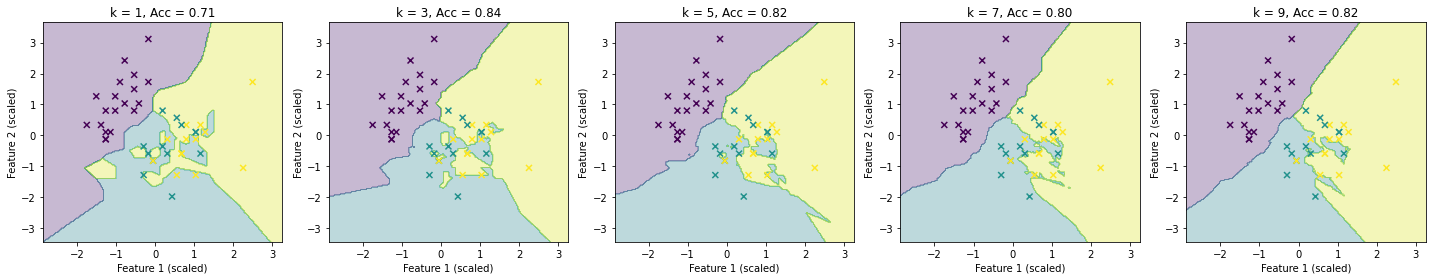

In [6]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

fig, axes = plt.subplots(1, len(k_values), figsize=(20, 4))

for ax, k in zip(axes, k_values):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', marker='x')
    ax.set_title(f"k = {k}, Acc = {results[k][0]:.2f}")
    ax.set_xlabel("Feature 1 (scaled)")
    ax.set_ylabel("Feature 2 (scaled)")

plt.tight_layout()
plt.show()